# 📌 골절 부위 비율에 따른 데이터 증강

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. 기존 데이터 불러오기

In [7]:
Fractured = np.load("./Fractured_240.npy")
Mask = np.load("./Fractured_mask_240.npy")

print("Fractured Shape :", Fractured.shape)
print("Fractured Mask Shape :", Mask.shape)

Fractured Shape : (717, 240, 240)
Fractured Mask Shape : (717, 240, 240)


# 2. 데이터 shape의 channel 추가
* 데이터 증강을 해주는 함수인 ImageDataGenerator를 사용하기 위해서는 아래와 같은 형태의 데이터를 input으로 줘야함.

In [8]:
Fractured = np.expand_dims(Fractured, axis=-1)
Mask = np.expand_dims(Mask, axis=-1)

print("Fractured shape :", Fractured.shape)
print("Mask shape :", Mask.shape)

Fractured shape : (717, 240, 240, 1)
Mask shape : (717, 240, 240, 1)


# 3. Data Augmentation
* image_generator와 mask_generator의 seed를 동일하게 하여 동일한 변환을 적용하도록 함.
* 기존 데이터는 그대로 활용하기 위해 우선 augmented list에 넣어 놓았습니다.
* augmented list의 크기가 2000이 될 때 까지 데이터를 증강하여 augmented list에 저장합니다.

In [9]:
# 이미지 및 마스크 증강 설정
image_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

mask_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 시드를 맞춰 이미지와 마스크가 동일한 변환을 받도록 설정
seed = 42
image_generator = image_datagen.flow(Fractured, batch_size=1, seed=seed)
mask_generator = mask_datagen.flow(Mask, batch_size=1, seed=seed)

# 기존 데이터 추가 및 증강 데이터 저장할 리스트 초기화
augmented_images = []
augmented_masks = []

# 기존 데이터 추가
augmented_images.extend(Fractured)
augmented_masks.extend(Mask)

# 2000개 데이터가 될 때까지 증강 데이터 생성
total_data = len(augmented_images)
while total_data < 2000:
    augmented_image = next(image_generator)[0].astype('uint8')
    augmented_mask = next(mask_generator)[0].astype('uint8')
    
    augmented_images.append(augmented_image)
    augmented_masks.append(augmented_mask)
    
    total_data += 1

# 넘파이 배열로 변환
augmented_images = np.array(augmented_images)
augmented_masks = np.array(augmented_masks)

# 저장할 디렉터리 생성
output_dir = "augmented_data"
os.makedirs(output_dir, exist_ok=True)

# 데이터 저장
np.save(os.path.join(output_dir, "augmented_images.npy"), augmented_images)
np.save(os.path.join(output_dir, "augmented_masks.npy"), augmented_masks)

print(f"총 {len(augmented_images)}개의 증강된 이미지와 마스크가 저장되었습니다.")

총 2000개의 증강된 이미지와 마스크가 저장되었습니다.


# 4. 증강한 데이터 시각화 

In [11]:
augmented_images = np.load("./augmented_data/augmented_images.npy")
augmented_masks = np.load("./augmented_data/augmented_masks.npy")

print("augmented_images Shape :", augmented_images.shape)
print("augmented_masks Shape :", augmented_masks.shape)

augmented_images Shape : (2000, 240, 240, 1)
augmented_masks Shape : (2000, 240, 240, 1)


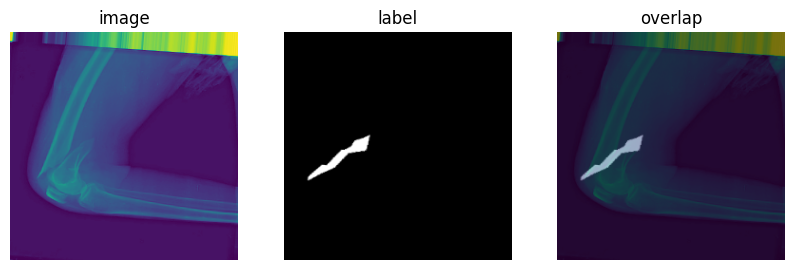

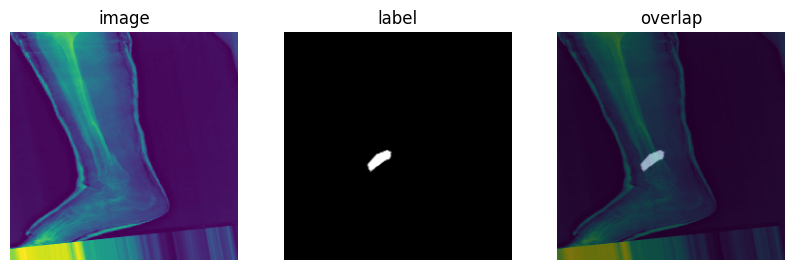

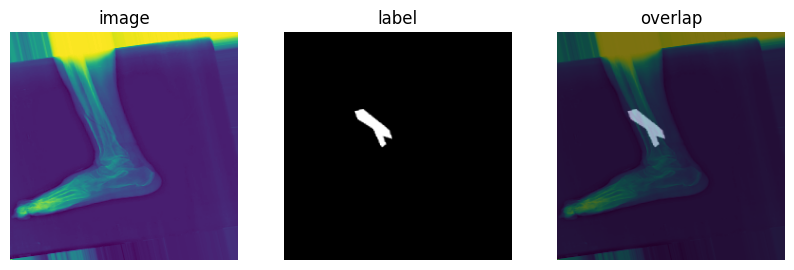

In [17]:
import matplotlib.pyplot as plt

num_list = [900, 1860, 1999]

for num in num_list:
    plt.figure(figsize=(10, 5))
    
    # 원본 이미지
    plt.subplot(131)
    plt.imshow(augmented_images[num])
    plt.title("image")
    plt.axis("off")
    
    # 마스크 이미지
    plt.subplot(132)
    plt.imshow(augmented_masks[num], cmap='gray')
    plt.title("label")
    plt.axis("off")
    
    # 겹쳐보기 (overlap)
    plt.subplot(133)
    plt.imshow(augmented_masks[num], cmap='gray')
    plt.title("overlap")
    plt.axis("off")
    plt.imshow(augmented_images[num], alpha=0.5)
    
    plt.show()
